<a href="https://colab.research.google.com/github/Ahtesham-Ibne-Mostafa/Machine_Etymology/blob/main/House_Price_Bangaluru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [109]:
df=pd.read_csv('https://raw.githubusercontent.com/Ahtesham-Ibne-Mostafa/Machine_Etymology/main/Datasets/bengaluru_house_prices.csv')

In [110]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [111]:
len(df.location.unique())

1306

In [112]:
df.shape

(13320, 9)

<BarContainer object of 13320 artists>

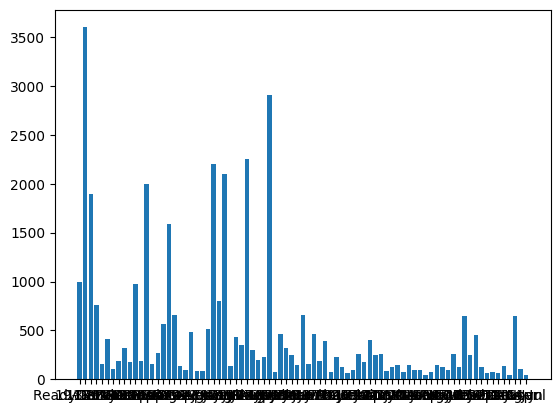

In [113]:
plt.bar(df.availability, df.price)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [115]:
len(df.society.unique())

2689

In [116]:
len(df.total_sqft.unique())

2117

In [117]:
def total_sqft(x):
  if '-' in x :
    x = x.split('-')
    x = (float(x[0])+float(x[1]))/2
  try :
    x=float(x)
    return x
  except :
    return None

df.total_sqft = df.total_sqft.apply(total_sqft)


In [118]:
df.total_sqft.isnull().sum()

46

In [119]:
df = df.dropna(subset='total_sqft')

In [120]:
df.total_sqft.isnull().sum()

0

In [121]:
df.shape

(13274, 9)

In [122]:
cor =df.corr()
cor

<ipython-input-122-f7462b26eb9a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor =df.corr()


,total_sqft,bath,balcony,price
total_sqft,1.000000,0.392743,0.148661,0.575559
bath,0.392743,1.000000,0.203675,0.455994
balcony,0.148661,0.203675,1.000000,0.120400
price,0.575559,0.455994,0.120400,1.000000


In [123]:
mean = df.total_sqft.mean()
std = df.total_sqft.std()

def outliar(x):
  up = mean + 3* std
  low = mean - 3*std

  if x > up or x < low :
    return mean
  else :
    return x

df.total_sqft = df.total_sqft.apply(outliar)

In [124]:
df['size'].value_counts()

2 BHK         5193
3 BHK         4301
4 Bedroom      824
4 BHK          588
3 Bedroom      542
1 BHK          534
2 Bedroom      325
5 Bedroom      294
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           58
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [125]:
def size(f):
  if type(f) == float:
    return None
  f = f.split(' ')
  return int(f[0])

df['size']=df['size'].apply(size)

In [126]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,NaN,1200.0,2.0,1.0,51.00


In [127]:
df['sqft_per_room'] = df['total_sqft']/df['size']

In [128]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,sqft_per_room
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07,528.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00,650.0
2,Built-up Area,Ready To Move,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00,480.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00,507.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,NaN,1200.0,2.0,1.0,51.00,600.0


In [129]:
mean = df['size'].mean()
std = df['size'].std()

def outliar(x):
  up = mean + 3* std
  low = mean - 3*std

  if x > up or x < low :
    return None
  else :
    return x

df['size'] = df['size'].apply(outliar)

In [130]:
df = df.dropna(subset='size')

In [131]:
df.sqft_per_room.max()

3820.0

In [132]:
df.sqft_per_room.min()

0.25

In [133]:
df.corr()

<ipython-input-133-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,size,total_sqft,bath,balcony,price,sqft_per_room
size,1.000000,0.562275,0.850041,0.230802,0.450488,-0.188735
total_sqft,0.562275,1.000000,0.621026,0.233959,0.537068,0.636870
bath,0.850041,0.621026,1.000000,0.241179,0.511320,0.002591
balcony,0.230802,0.233959,0.241179,1.000000,0.120533,0.045834
price,0.450488,0.537068,0.511320,0.120533,1.000000,0.250836
sqft_per_room,-0.188735,0.636870,0.002591,0.045834,0.250836,1.000000


In [134]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [135]:

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df["area_type"] = encoder.fit_transform(df["area_type"])

In [136]:

df["location"] = encoder.fit_transform(df["location"])

In [137]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,sqft_per_room
0,3,19-Dec,403,2.0,Coomee,1056.0,2.0,1.0,39.07,528.0
1,2,Ready To Move,301,4.0,Theanmp,2600.0,5.0,3.0,120.00,650.0
2,0,Ready To Move,1144,3.0,NaN,1440.0,2.0,3.0,62.00,480.0
3,3,Ready To Move,735,3.0,Soiewre,1521.0,3.0,1.0,95.00,507.0
4,3,Ready To Move,696,2.0,NaN,1200.0,2.0,1.0,51.00,600.0


In [138]:
df.corr()

<ipython-input-138-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,area_type,location,size,total_sqft,bath,balcony,price,sqft_per_room
area_type,1.000000,0.032404,-0.117780,-0.067253,-0.090692,0.100743,-0.056420,0.021192
location,0.032404,1.000000,0.007455,0.045614,0.022108,-0.000587,0.017289,0.052573
size,-0.117780,0.007455,1.000000,0.562275,0.850041,0.230802,0.450488,-0.188735
total_sqft,-0.067253,0.045614,0.562275,1.000000,0.621026,0.233959,0.537068,0.636870
bath,-0.090692,0.022108,0.850041,0.621026,1.000000,0.241179,0.511320,0.002591
balcony,0.100743,-0.000587,0.230802,0.233959,0.241179,1.000000,0.120533,0.045834
price,-0.056420,0.017289,0.450488,0.537068,0.511320,0.120533,1.000000,0.250836
sqft_per_room,0.021192,0.052573,-0.188735,0.636870,0.002591,0.045834,0.250836,1.000000


In [139]:
df.drop(['society','availability'],axis=1, inplace = True)

In [140]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,sqft_per_room
0,3,403,2.0,1056.0,2.0,1.0,39.07,528.0
1,2,301,4.0,2600.0,5.0,3.0,120.00,650.0
2,0,1144,3.0,1440.0,2.0,3.0,62.00,480.0
3,3,735,3.0,1521.0,3.0,1.0,95.00,507.0
4,3,696,2.0,1200.0,2.0,1.0,51.00,600.0


In [141]:
df = df.dropna(subset=['bath'])

In [142]:
df.balcony = df.balcony.fillna(df.balcony.mean())

<ipython-input-142-f9f5667ef4f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.balcony = df.balcony.fillna(df.balcony.mean())


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12935 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      12935 non-null  int64  
 1   location       12935 non-null  int64  
 2   size           12935 non-null  float64
 3   total_sqft     12935 non-null  float64
 4   bath           12935 non-null  float64
 5   balcony        12935 non-null  float64
 6   price          12935 non-null  float64
 7   sqft_per_room  12935 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 909.5 KB


In [144]:
target='price'

In [145]:
X= df.loc[:,df.columns != target]
Y= df[target]
Y=Y.astype('int')

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [147]:
X.head()

,area_type,location,size,total_sqft,bath,balcony,sqft_per_room
0,3,403,2.0,1056.0,2.0,1.0,528.0
1,2,301,4.0,2600.0,5.0,3.0,650.0
2,0,1144,3.0,1440.0,2.0,3.0,480.0
3,3,735,3.0,1521.0,3.0,1.0,507.0
4,3,696,2.0,1200.0,2.0,1.0,600.0


In [148]:
Y.head()

0     39
1    120
2     62
3     95
4     51
Name: price, dtype: int64

In [149]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12935 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      12935 non-null  int64  
 1   location       12935 non-null  int64  
 2   size           12935 non-null  float64
 3   total_sqft     12935 non-null  float64
 4   bath           12935 non-null  float64
 5   balcony        12935 non-null  float64
 6   sqft_per_room  12935 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 808.4 KB


In [150]:
Y.info()

<class 'pandas.core.series.Series'>
Int64Index: 12935 entries, 0 to 13319
Series name: price
Non-Null Count  Dtype
--------------  -----
12935 non-null  int64
dtypes: int64(1)
memory usage: 202.1 KB


In [151]:
X_train

,area_type,location,size,total_sqft,bath,balcony,sqft_per_room
5228,3,403,2.0,1031.0,2.0,1.0,515.500000
13096,3,775,2.0,1307.0,2.0,2.0,653.500000
10512,2,919,2.0,1500.0,2.0,0.0,750.000000
4335,3,340,3.0,1600.0,3.0,3.0,533.333333
10707,2,1217,3.0,4800.0,4.0,2.0,1600.000000
...,...,...,...,...,...,...,...
4227,3,1217,2.0,1340.0,2.0,1.0,670.000000
896,3,61,2.0,1070.0,2.0,1.0,535.000000
8264,3,401,3.0,1571.0,3.0,2.0,523.666667
6265,3,660,3.0,1900.0,3.0,3.0,633.333333


In [152]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, Y_train)

y_pred = gnb.predict(X_test)

In [153]:
from sklearn.metrics import accuracy_score

score = accuracy_score(Y_test,y_pred)

print(score)


0.02396598376497874
